In [38]:
#import .csv file for question 1 (Listening to Music & its effects on Mental Health) 

from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 
import scipy.stats as st
from scipy.stats import linregress

# Import Seaborn - New libraries not in class
import seaborn as sns


music = Path('dataset/music1.csv')
music_df = pd.read_csv(music, low_memory=False, encoding='UTF-8')
df = music_df.replace('inf', np.nan)

## Clean up Data

In [39]:
df.head()

,ID,Timestamp,Year,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,1,8/27/2022 19:29:02,2022,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,2,8/27/2022 19:57:31,2022,63.0,Pandora,1.5,Yes,No,No,Rock,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,3,8/27/2022 21:28:18,2022,18.0,Spotify,4.0,No,No,No,Video game music,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,4,8/27/2022 21:40:40,2022,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,5,8/27/2022 21:54:47,2022,18.0,Spotify,4.0,Yes,No,No,R&B,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            736 non-null    int64  
 1   Timestamp                     736 non-null    object 
 2   Year                          736 non-null    int64  
 3   Age                           735 non-null    float64
 4   Primary streaming service     735 non-null    object 
 5   Hours per day                 736 non-null    float64
 6   While working                 733 non-null    object 
 7   Instrumentalist               732 non-null    object 
 8   Composer                      735 non-null    object 
 9   Fav genre                     736 non-null    object 
 10  Exploratory                   736 non-null    object 
 11  Foreign languages             732 non-null    object 
 12  BPM                           629 non-null    float64
 13  Frequ

In [41]:
# Drop Unncessary Columns
df.drop(columns=['Timestamp', 'Permissions', 'BPM'], inplace=True)

# Drop missing values in the dataset
df = df.dropna()

In [42]:
# Select float64 columns
float_cols = df.select_dtypes(include=['float64']).columns

# Convert float64 columns to int64 using .astype()
df[float_cols] = df[float_cols].astype('int64')

# Display a brief overview of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 718 entries, 2 to 735
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ID                            718 non-null    int64 
 1   Year                          718 non-null    int64 
 2   Age                           718 non-null    int64 
 3   Primary streaming service     718 non-null    object
 4   Hours per day                 718 non-null    int64 
 5   While working                 718 non-null    object
 6   Instrumentalist               718 non-null    object
 7   Composer                      718 non-null    object
 8   Fav genre                     718 non-null    object
 9   Exploratory                   718 non-null    object
 10  Foreign languages             718 non-null    object
 11  Frequency [Classical]         718 non-null    object
 12  Frequency [Country]           718 non-null    object
 13  Frequency [EDM]          


## Demographic Info

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

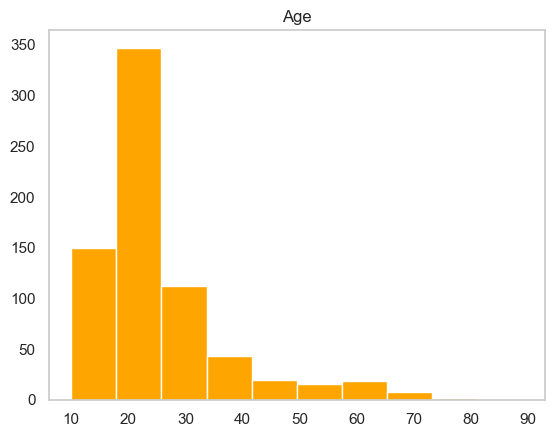

In [43]:
# Display Chart by Age

df.hist(['Age'], bins=10, color='Orange', grid=False)


In [44]:
# view Data with less than 10 counts
df['Age'].value_counts().loc[lambda x: x < 15]

Age
29    13
28    13
31    12
30    10
34     8
33     8
35     7
36     7
13     7
60     6
38     6
49     5
56     5
40     5
42     5
37     5
43     4
41     4
57     3
53     3
44     3
64     3
58     3
12     3
67     2
63     2
61     2
54     2
59     2
48     2
68     1
50     1
80     1
74     1
46     1
65     1
51     1
39     1
71     1
55     1
70     1
73     1
72     1
69     1
10     1
89     1
Name: count, dtype: int64

In [45]:
# view Data with 10 or more counts
df['Age'].value_counts().loc[lambda x: x >= 15]

Age
18    81
19    60
17    59
21    48
16    44
20    40
22    39
23    37
25    22
26    22
15    20
24    20
27    18
32    16
14    16
Name: count, dtype: int64

## Majority of the Demographic Info are in their late teens to early thirties. This is probably due to the survey collected data from discussion forums and social media sites which generally targets younger demographics. Data might be biased but will keep all age groups.

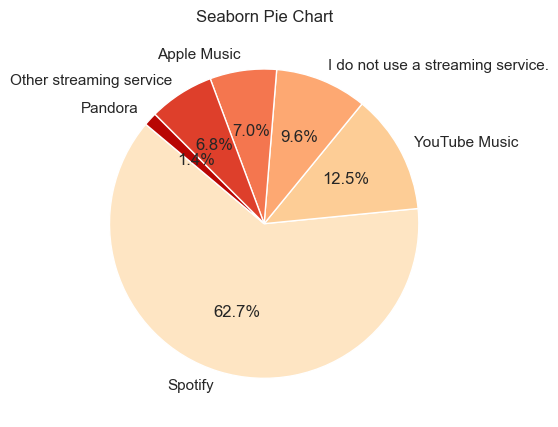

In [46]:
# Count the occurrences of each streaming service
stream_service = df['Primary streaming service'].value_counts()


# Set seaborn color palette
sns.set_palette('OrRd')

# Plotting with Seaborn
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(stream_service.values, labels=stream_service.index, autopct='%1.1f%%', startangle=140)
plt.title('Seaborn Pie Chart')

plt.tight_layout()
plt.show()

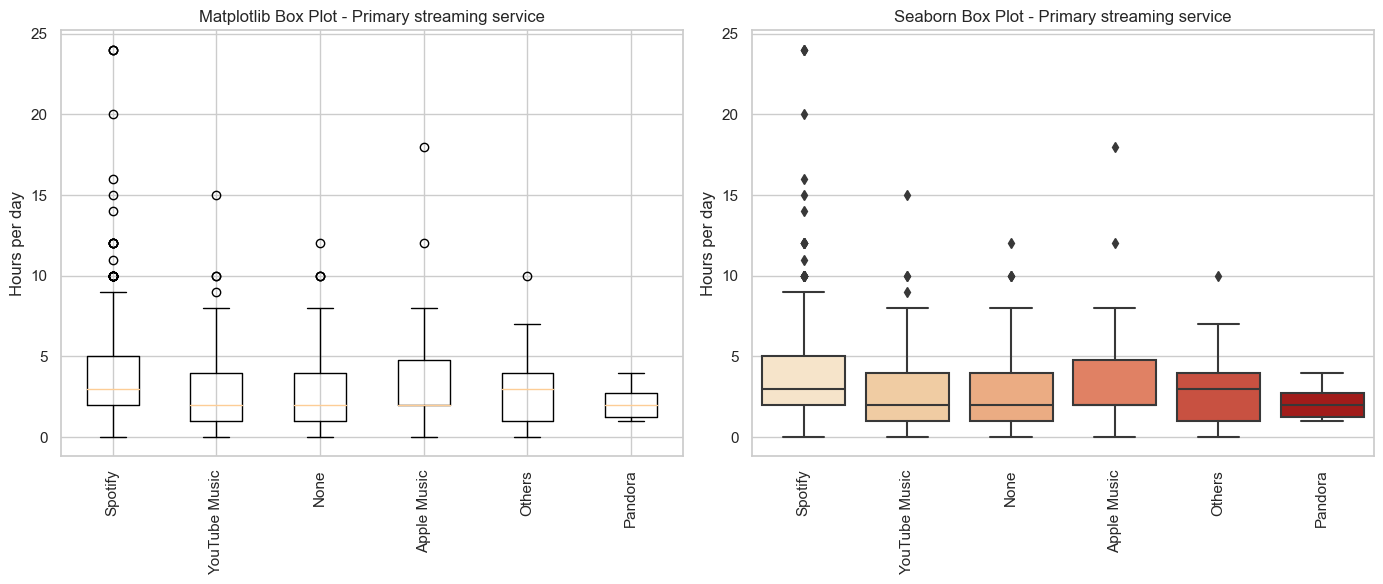

In [47]:
# Make a copy of the DataFrame
data = df.copy()[['Primary streaming service', 'Hours per day']]

# Replace specific values in the 'Primary streaming service' column
data['Primary streaming service'].replace(['Other streaming service', 'I do not use a streaming service.'], ['Others', 'None'], inplace=True)

# Matplotlib
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.boxplot([data[data['Primary streaming service'] == 'Spotify']['Hours per day'], 
             data[data['Primary streaming service'] == 'YouTube Music']['Hours per day'], 
             data[data['Primary streaming service'] == 'None']['Hours per day'], 
             data[data['Primary streaming service'] == 'Apple Music']['Hours per day'], 
             data[data['Primary streaming service'] == 'Others']['Hours per day'], 
             data[data['Primary streaming service'] == 'Pandora']['Hours per day']])
plt.title('Matplotlib Box Plot - Primary streaming service')
plt.ylabel('Hours per day')  # Add y-axis label
plt.xticks([1, 2, 3, 4, 5, 6], ['Spotify', 'YouTube Music', 'None', 'Apple Music', 'Others', 'Pandora'], rotation=90)

# Seaborn
plt.subplot(1, 2, 2)
sns.boxplot(x='Primary streaming service', y='Hours per day', data=data)
plt.xlabel('')  # Remove x-axis header
plt.title('Seaborn Box Plot - Primary streaming service')
plt.xticks(rotation=90)  # Rotate x-axis labels

plt.tight_layout()
plt.show()

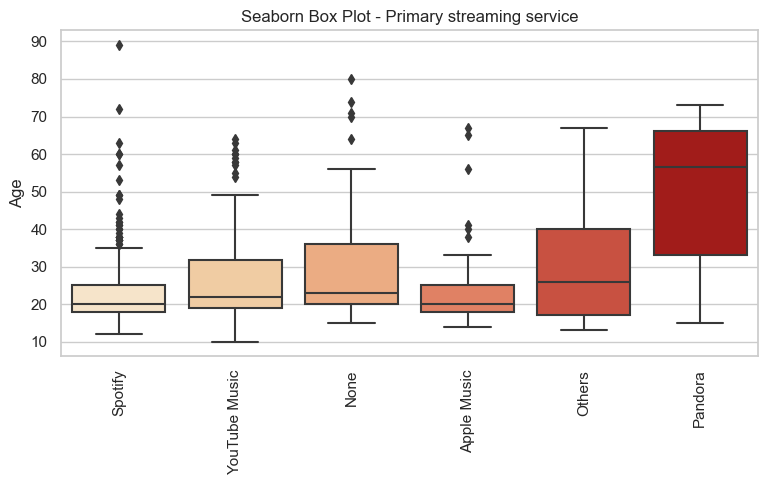

In [48]:
# Make a copy of the DataFrame
data1 = df.copy()

# Replace specific values in the 'Primary streaming service' column in the copied DataFrame
data1['Primary streaming service'].replace(['Other streaming service', 'I do not use a streaming service.'], ['Others', 'None'], inplace=True)

# Seaborn
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 2)
sns.set_style("whitegrid")
sns.boxplot(x='Primary streaming service', y='Age', data=data1)
plt.xlabel('')  # Remove x-axis header
plt.title('Seaborn Box Plot - Primary streaming service')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.tight_layout()
plt.show()

Mental Health

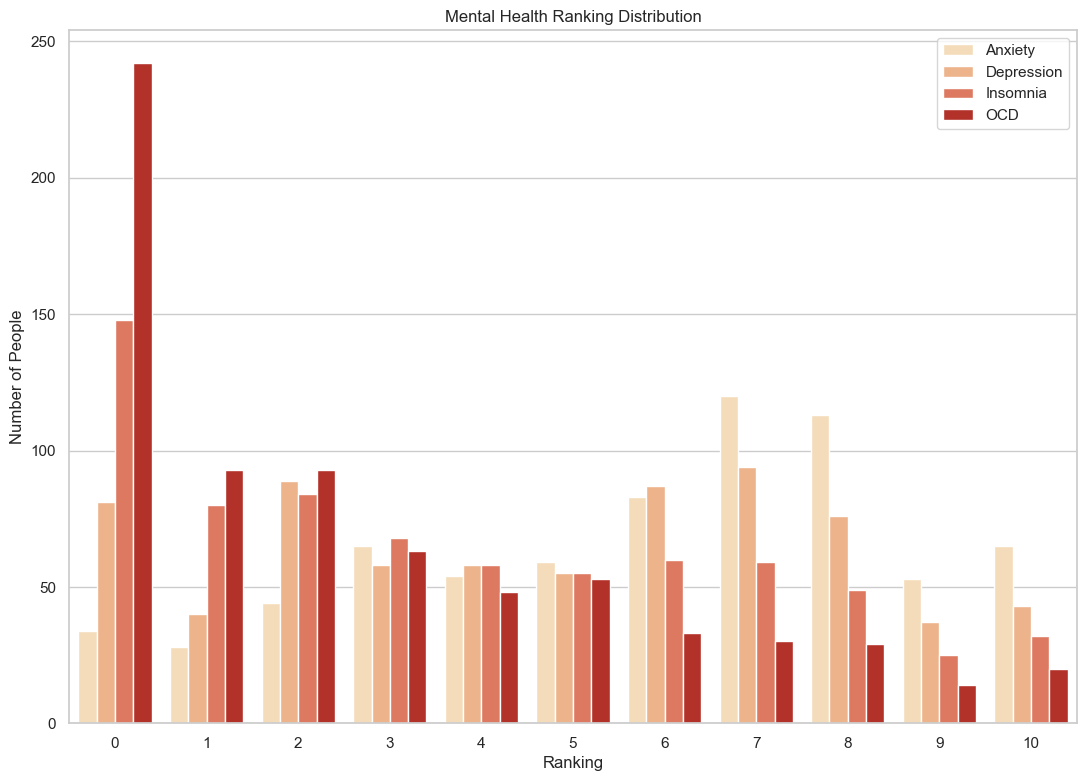

In [49]:
mental_health = ["Anxiety", "Depression", "Insomnia", "OCD"]

# Calculate the count of each ranking for each mental health condition
disorder_count = []
for disorder in mental_health:
    counts = [np.sum(df[disorder] == i) for i in range(11)]
    disorder_count.extend(counts)

# Create a DataFrame for Seaborn
data = {
    'Condition': np.repeat(mental_health, 11),
    'Ranking': np.tile(np.arange(11), len(mental_health)),
    'Count': disorder_count
}
sns.set_theme(style="whitegrid")
plt.figure(figsize=(13, 9))
sns.barplot(data=data, x='Ranking', y='Count', hue='Condition', palette="OrRd")
plt.title('Mental Health Ranking Distribution')
plt.xlabel('Ranking')
plt.ylabel('Number of People')
plt.show()

Text(0, 0.5, '')

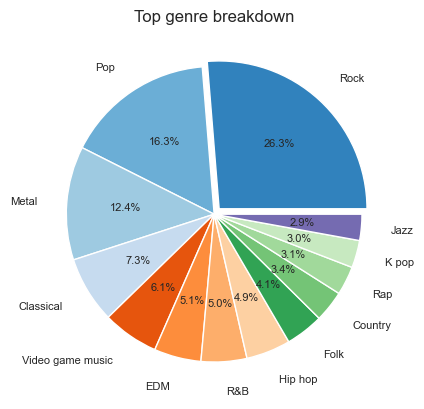

In [50]:
# Genere breakdown
genre = df["Fav genre"].value_counts().loc[lambda x: x>10]
genre.plot(kind='pie', labeldistance = 1.2, 
            explode=[0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,], 
            colors = sns.color_palette('tab20c')[0:13], autopct='%1.1f%%', textprops={'fontsize': 8}
            
                        )

plt.title('Top genre breakdown')
plt.ylabel("")

<Axes: title={'center': 'Music Effects on Mental Health'}>

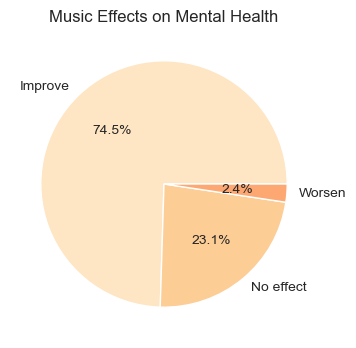

In [51]:
# Set seaborn color palette
sns.set_palette('OrRd')

plt.figure(figsize=(5,4))
plt.title('Music Effects on Mental Health')

effects = df['Music effects'].value_counts()
effects.plot(kind='pie', ylabel= '', autopct='%1.1f%%', textprops={'fontsize': 10})

In [52]:
# Converting to JSON file

import csv
import json

# Path to your CSV file
csv_file_path = 'dataset/Music1.csv'

# Path to save the resulting JSON file
json_file_path = 'dataset/Music1.json'

# Function to convert CSV to JSON
def csv_to_json(csv_file_path, json_file_path):
    # Read CSV file and convert each row to a dictionary
    data = []
    with open(csv_file_path, 'r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            data.append(row)

    # Write JSON data to a file
    with open(json_file_path, 'w') as json_file:
        json.dump(data, json_file, indent=4)

    print('CSV file successfully converted to JSON.')

# Convert CSV to JSON
csv_to_json(csv_file_path, json_file_path)

CSV file successfully converted to JSON.
